In [2]:
import pandas as pd
import seaborn as sns
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Data Preprocessing
df = pd.read_csv('music_genre.csv')

# Remove categorical columns, and replace '?' with NaN
df = df.drop([
    'artist_name',
    'track_name',
    'key',
    'tempo',
    'obtained_date',
    'instance_id'
], axis=1).replace('?', float('NaN')).dropna()

# Check if any of the values in the dataset are NA; if not, this test throws an error
assert df.isna().sum().sum() == 0

# Map each genre to a unique integer
genre_to_int = {
    'Electronic': 0,
    'Anime': 1,
    'Jazz': 2,
    'Alternative': 3,
    'Country': 4,
    'Rap': 5,
    'Blues': 6,
    'Rock': 7,
    'Classical': 8,
    'Hip-Hop': 9
}

# Map 'Major' and 'Minor' to [0, 1]
mode_to_int = {
    'Major': 0,
    'Minor': 1
}

# Replace the music_genre column so that they are all of type int
df['music_genre'] = df['music_genre'].map(genre_to_int)
df['mode'] = df['mode'].map(mode_to_int)
print(df['mode'])

# Data Overview
df.describe()

0        1
1        1
2        0
3        0
4        0
        ..
50000    0
50001    0
50002    0
50003    1
50004    1
Name: mode, Length: 50000, dtype: int64


popularity  acousticness  danceability   duration_ms        energy  \
count  50000.000000  50000.000000  50000.000000  5.000000e+04  50000.000000   
mean      44.220420      0.306383      0.558241  2.212526e+05      0.599755   
std       15.542008      0.341340      0.178632  1.286720e+05      0.264559   
min        0.000000      0.000000      0.059600 -1.000000e+00      0.000792   
25%       34.000000      0.020000      0.442000  1.748000e+05      0.433000   
50%       45.000000      0.144000      0.568000  2.192810e+05      0.643000   
75%       56.000000      0.552000      0.687000  2.686122e+05      0.815000   
max       99.000000      0.996000      0.986000  4.830606e+06      0.999000   

       instrumentalness      liveness      loudness          mode  \
count      50000.000000  50000.000000  50000.000000  50000.000000   
mean           0.181601      0.193896     -9.133761      0.358020   
std            0.325409      0.161637      6.162990      0.479423   
min            0.000000      0.009670    -47.046000      0.000000   
25%            0.000000      0.096900    -10.860000      0.000000   
50%            0.000158      0.126000     -7.276500      0.000000   
75%            0.155000      0.244000     -5.173000      1.000000   
max            0.996000      1.000000      3.744000      1.000000   

        speechiness       valence  music_genre  
count  50000.000000  50000.000000  50000.00000  
mean       0.093586      0.456264      4.50000  
std        0.101373      0.247119      2.87231  
min        0.022300      0.000000      0.00000  
25%        0.036100      0.257000      2.00000  
50%        0.048900      0.448000      4.50000  
75%        0.098525      0.648000      7.00000  
max        0.942000      0.992000      9.00000

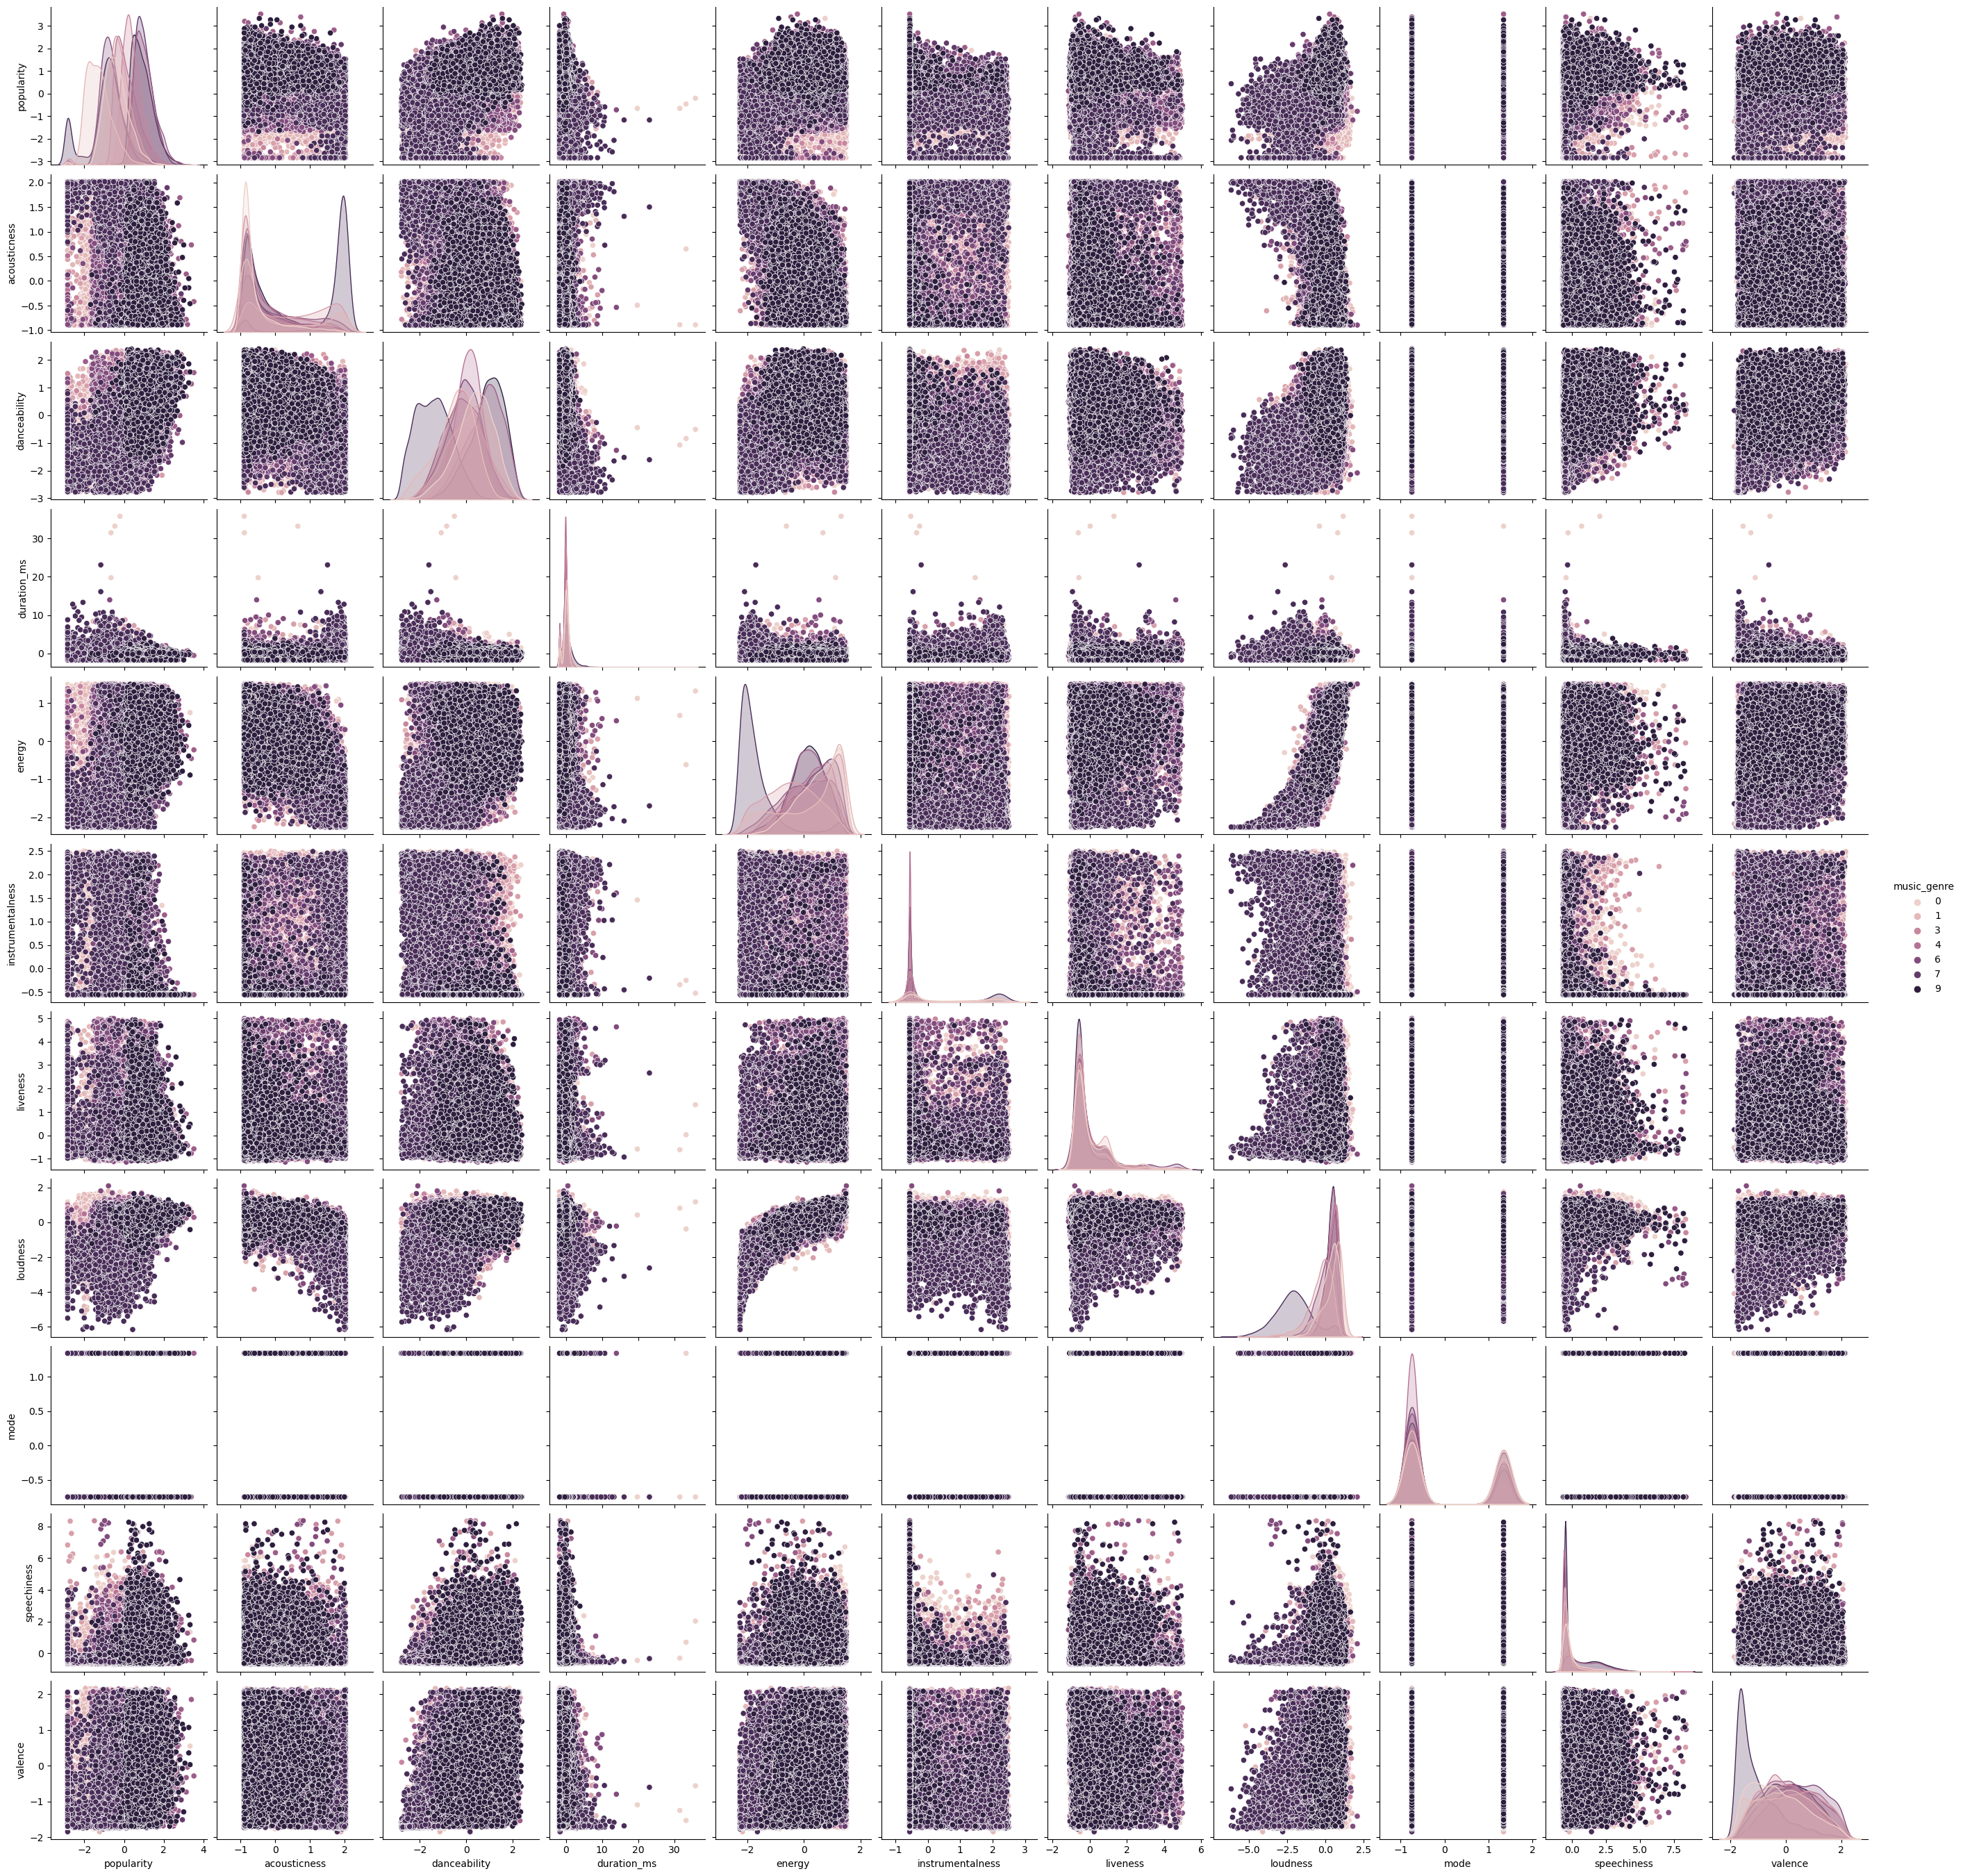

In [8]:
sns.pairplot(df, hue="music_genre")

We observe that the data is not linearly separable based on the pairplot, so a linear model would not fit the data well.

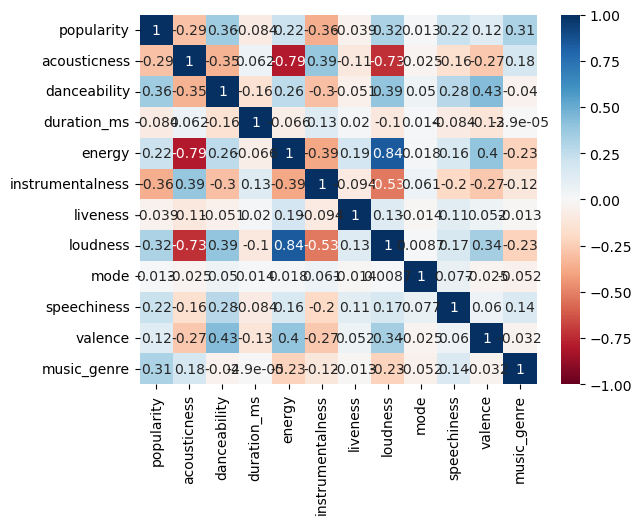

In [5]:
# Heatmap Analysis
data = df.copy().corr()
pcmp = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')


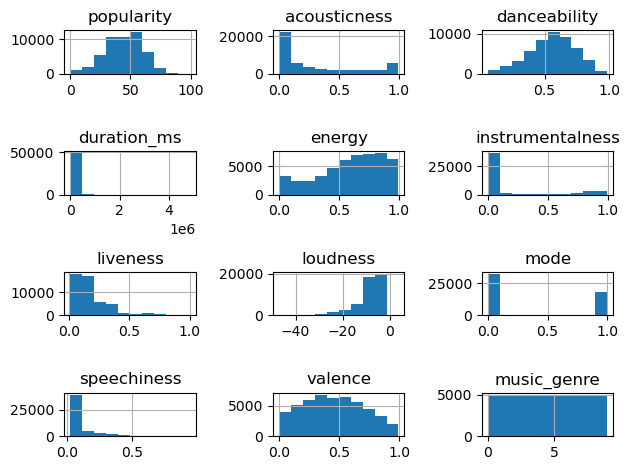

In [6]:
# Histograms for Each Attribute Pre-Standardized
df.hist()
plt.tight_layout()
plt.show()

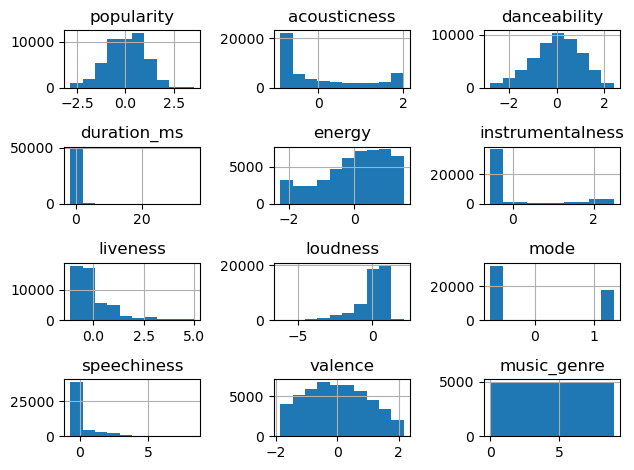

popularity  acousticness  danceability   duration_ms        energy  \
count  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean   1.796252e-16  2.842171e-16 -1.250555e-16 -1.125500e-16 -7.958079e-18   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.845248e+00 -8.975970e-01 -2.791471e+00 -1.719534e+00 -2.264025e+00   
25%   -6.576063e-01 -8.390039e-01 -6.507353e-01 -3.610194e-01 -6.303180e-01   
50%    5.016004e-02 -4.757261e-01  5.463274e-02 -1.532286e-02  1.634630e-01   
75%    7.579264e-01  7.195750e-01  7.208136e-01  3.680687e-01  8.136074e-01   
max    3.524649e+00  2.020344e+00  2.394663e+00  3.582288e+01  1.509111e+00   

       instrumentalness      liveness      loudness          mode  \
count      5.000000e+04  5.000000e+04  5.000000e+04  5.000000e+04   
mean      -2.728484e-17 -1.014655e-16 -1.136868e-16 -2.273737e-17   
std        1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min       -5.580745e-01 -1.139765e+00 -6.151660e+00 -7.467804e-01   
25%       -5.580745e-01 -6.000939e-01 -2.801004e-01 -7.467804e-01   
50%       -5.575889e-01 -4.200591e-01  3.013602e-01 -7.467804e-01   
75%       -8.174618e-02  3.099788e-01  6.426752e-01  1.339082e+00   
max        2.502719e+00  4.987171e+00  2.089552e+00  1.339082e+00   

        speechiness       valence  music_genre  
count  5.000000e+04  5.000000e+04  50000.00000  
mean  -9.094947e-17  8.128609e-17      4.50000  
std    1.000010e+00  1.000010e+00      2.87231  
min   -7.032154e-01 -1.846356e+00      0.00000  
25%   -5.670834e-01 -8.063593e-01      2.00000  
50%   -4.408160e-01 -3.344372e-02      4.50000  
75%    4.871678e-02  7.758919e-01      7.00000  
max    8.369295e+00  2.167949e+00      9.00000

In [7]:
# Standardize Data for SVM

# Initialize a StandardScaler
scaler = StandardScaler()

# List of columns to exclude from standardization
exclude_columns = ['instance_id', 'music_genre']

# Standardize each column
for column in df.columns:
    if column in exclude_columns or df[column].dtype not in ['int64', 'float64']:
        continue
    # Check if the column is numeric and not already standardized
    if df[column].dtype in ['int64', 'float64'] and (df[column].mean() != 0 or df[column].std() != 1):
        df[column] = scaler.fit_transform(df[[column]])

# Write the preprocessed data to a CSV file
df.to_csv('preprocessed_data.csv', index=False)

# View histograms and data after standardizing
df.hist()
plt.tight_layout()
plt.show()

df.describe()
